##### Copyright 2018 The TensorFlow Authors. @ https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb

# Classification de base : classer les images de vêtements

Ce guide entraîne un modèle de réseau neuronal pour classer les images de vêtements, comme les baskets et les chemises. Ce n'est pas grave si vous ne comprenez pas tous les détails ; il s'agit d'un aperçu rapide d'un programme TensorFlow complet avec les détails expliqués au fur et à mesure.

Ce guide utilise [tensorflow + keras](https://www.tensorflow.org/guide/keras), une API de haut niveau pour créer et entraîner des modèles dans TensorFlow.

# Installation

In [37]:
!pip install "keras==2.*" tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 9.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 4.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 4.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling w

# Importer des bibliothèques

In [1]:
import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


2024-03-13 20:47:02.294529: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 20:47:02.577579: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 20:47:02.577621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 20:47:02.619385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 20:47:02.662706: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 20:47:02.663660: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Importer l'ensemble de données Fashion MNIST

Ce guide utilise l'ensemble de données [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), qui contient 70 000 images en niveaux de gris réparties en 10 catégories. Les images montrent des articles vestimentaires individuels à basse résolution (28 par 28 pixels), comme illustré ci-dessous :

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Échantillons de Fashion-MNIST</a> (par Zalando, Licence MIT).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST est conçu comme un remplacement direct de l'ensemble de données classique [MNIST](http://yann.lecun.com/exdb/mnist/) — souvent utilisé comme "Bonjour, Monde" des programmes d'apprentissage automatique pour la vision par ordinateur. L'ensemble de données MNIST contient des images de chiffres écrits à la main (0, 1, 2, etc.) dans un format identique à celui des articles vestimentaires que vous utiliserez ici.

Ce guide utilise Fashion MNIST pour sa variété et parce que c'est un problème légèrement plus difficile que le MNIST classique. Les deux ensembles de données sont relativement petits et sont utilisés pour vérifier qu'un algorithme fonctionne comme prévu. Ce sont de bons points de départ pour tester et déboguer le code.

Ici, 60 000 images sont utilisées pour entraîner le réseau et 10 000 images pour évaluer la précision avec laquelle le réseau a appris à classer les images. Vous pouvez accéder directement à Fashion MNIST depuis TensorFlow. Importez et [chargez les données de Fashion MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directement depuis TensorFlow :

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

Le chargement de l'ensemble de données renvoie quatre tableaux NumPy :

* Les tableaux `train_images` et `train_labels` sont l'*ensemble d'entraînement* — les données que le modèle utilise pour apprendre.
* Le modèle est testé par rapport à l'*ensemble de test*, les tableaux `test_images` et `test_labels`.

Les images sont des tableaux NumPy de taille 28x28, avec des valeurs de pixels allant de 0 à 255. Les *étiquettes* sont un tableau d'entiers, allant de 0 à 9. Elles correspondent à la *classe* de vêtement représentée par l'image :

<table>
  <tr>
    <th>Étiquette</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Haut/T-shirt</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pantalon</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pull</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Robe</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Manteau</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandale</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Chemise</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Basket</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Sac</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Bottine</td>
  </tr>
</table>

Chaque image est associée à une seule étiquette. Comme les *noms de classe* ne sont pas inclus dans l'ensemble de données, stockez-les ici pour les utiliser ultérieurement lors du traçage des images :

In [3]:
class_names = ['Haut/T-shirt', 'Pantalon', 'Pull', 'Robe', 'Manteau',
               'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine']

## Explorer les données

Avant d'entraîner le modèle, explorons le format de l'ensemble de données. Voici ce que nous savons : il y a 60 000 images dans l'ensemble d'entraînement, et chaque image est représentée par une grille de 28 x 28 pixels :

In [4]:
train_images.shape

(60000, 28, 28)

De même, il y a 60 000 étiquettes dans l'ensemble d'entraînement :

In [5]:
len(train_labels)

60000

Chaque étiquette est un entier compris entre 0 et 9 :

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Il y a 10 000 images dans l'ensemble de test (`test_images`). Encore une fois, chaque image est représentée par une grille de 28 x 28 pixels :

In [7]:
????

(10000, 28, 28)

Et l'ensemble de test contient 10 000 étiquettes (`test_labels`) d'images :

In [8]:
????

10000

## Prétraitement des données

Les données doivent être prétraitées avant d'entraîner le réseau. Si vous examinez la première image dans l'ensemble d'entraînement, vous verrez que les valeurs des pixels se situent dans la plage de 0 à 255 :

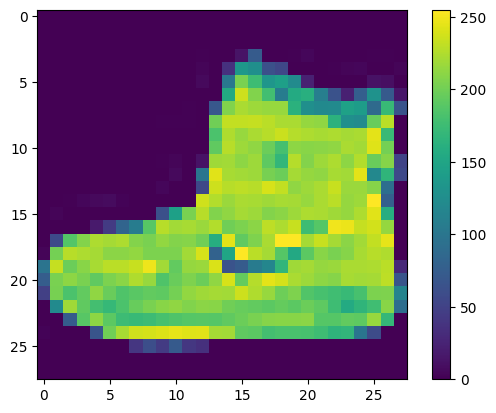

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Avant de les fournir au modèle de réseau neuronal, il est essentiel de mettre les valeurs des pixels à l'échelle dans une plage de 0 à 1. Cette étape de mise à l'échelle améliore la stabilité et l'efficacité des calculs réalisés par le réseau neuronal. En outre, elle garantit que les valeurs des pixels ont un impact uniforme sur l'entraînement du modèle, favorisant ainsi une meilleure généralisation et des performances globales améliorées.

Pour réaliser cette mise à l'échelle, divisez simplement les valeurs des pixels par 255. Il est crucial que cette opération soit effectuée de la même manière sur l'ensemble d'entraînement et l'ensemble de test.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Pour vérifier que les données sont dans le format correct et que vous êtes prêt à construire et entraîner le réseau, affichons les 25 premières images de l'*ensemble d'entraînement* et affichons le nom de classe sous chaque image.

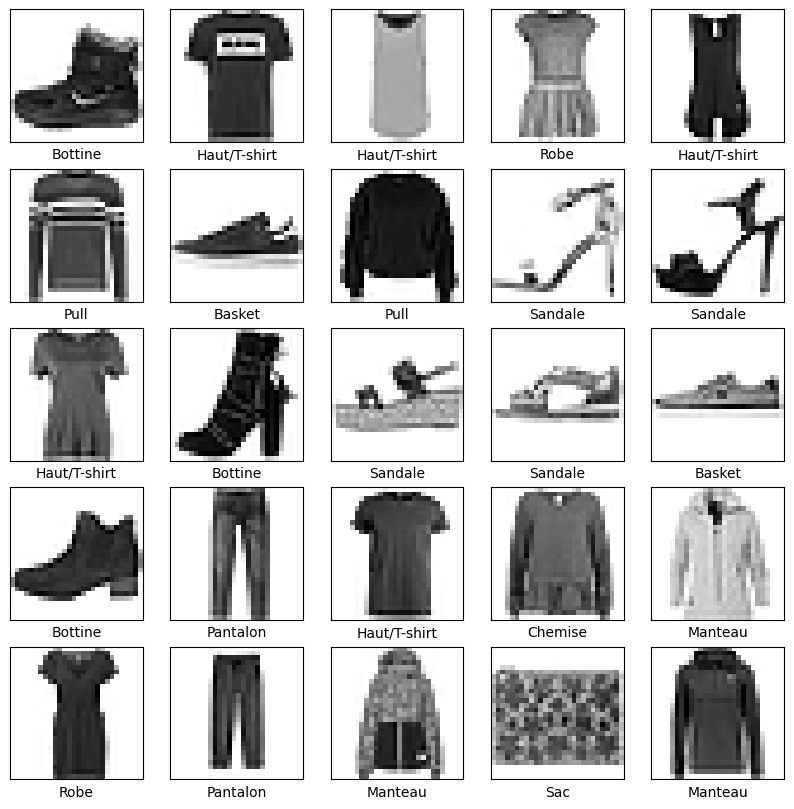

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construction du modèle

La construction du réseau neuronal nécessite la configuration des différentes couches du modèle, puis la compilation du modèle.

### Configuration des couches

Le bloc de construction de base d'un réseau neuronal est la [*couche*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Les couches extraient des représentations à partir des données qui leur sont fournies. Espérons que ces représentations soient pertinentes pour le problème traité.

La plupart de l'apprentissage profond consiste à chaîner ensemble des couches simples. La plupart des couches, telles que `keras.layers.Dense`, possèdent des paramètres qui sont appris pendant l'entraînement.

In [30]:
model = keras.Sequential([
    keras.layers.Input((28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])

La première couche de ce réseau, `keras.layers.Flatten`, transforme le format des images d'un tableau bidimensionnel (de 28 par 28 pixels) en un tableau unidimensionnel (de 28 * 28 = 784 pixels). Vous pouvez penser à cette couche comme un déroulement des lignes de pixels de l'image et les aligner. Cette couche n'a pas de paramètres à apprendre ; elle ne fait que reformater les données.

Après que les pixels ont été aplatis, le réseau se compose d'une séquence de deux couches `keras.layers.Dense`. Ce sont des couches neuronales connectées de manière dense, ou entièrement connectées. La première couche `Dense` comporte 128 nœuds (ou neurones). La deuxième (et dernière) couche retourne un tableau de logits de longueur 10. Chaque nœud contient un score indiquant que l'image actuelle appartient à l'une des 10 classes.

### Compiler le modèle

Avant que le modèle ne soit prêt pour l'entraînement, il a besoin de quelques réglages supplémentaires. Ceux-ci sont ajoutés lors de l'étape de [*compilation*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) du modèle :

* [*Optimiseur*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — C'est ainsi que le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
* [*Fonction de perte*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) — Cela mesure à quel point le modèle est précis pendant l'entraînement. Vous voulez minimiser cette fonction pour "diriger" le modèle dans la bonne direction.
* [*Métriques*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — Utilisées pour surveiller les étapes d'entraînement et de test. L'exemple suivant utilise la *précision*, la fraction des images correctement classées.

In [31]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entraîner le modèle

L'entraînement du modèle de réseau neuronal nécessite les étapes suivantes :

1. Fournir les données d'entraînement au modèle. Dans cet exemple, les données d'entraînement se trouvent dans les tableaux `train_images` et `train_labels`.
2. Le modèle apprend à associer les images et les étiquettes.
3. Vous demandez au modèle de faire des prédictions sur un ensemble de test — dans cet exemple, le tableau `test_images`.
4. Vérifiez que les prédictions correspondent aux étiquettes du tableau `test_labels`.

### Alimenter le modèle

Pour commencer l'entraînement, appelez la méthode [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) — ainsi nommée parce qu'elle "ajuste" le modèle aux données d'entraînement :

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4985 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3105 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2785 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2372 - accurac

Pendant que le modèle s'entraîne, les métriques de perte et de précision sont affichées. Ce modèle atteint une précision d'environ 0,91 (ou 91 %) sur les données d'entraînement.

### Évaluer l'accuracy

Ensuite, comparez les performances du modèle sur l'ensemble de données de test :

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3433 - accuracy: 0.8816 - 424ms/epoch - 1ms/step

Test accuracy: 0.881600022315979


Il s'avère que la précision sur l'ensemble de données de test est un peu inférieure à la précision sur l'ensemble de données d'entraînement. Cet écart entre la précision d'entraînement et la précision de test représente *le surajustement*. Le surajustement se produit lorsqu'un modèle d'apprentissage automatique performe moins bien sur de nouvelles entrées, jamais vues auparavant, que sur les données d'entraînement. Un modèle surajusté "mémorise" le bruit et les détails dans l'ensemble de données d'entraînement à un point tel qu'il impacte négativement les performances du modèle sur les nouvelles données. Pour plus d'informations, consultez les liens suivants :
* [Démontrer le surajustement](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
* [Stratégies pour prévenir le surajustement](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

In [47]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 980us/step


Ici, le modèle a prédit l'étiquette pour chaque image dans l'ensemble de test. Jetons un coup d'œil à la première prédiction :

In [35]:
predictions[0]

array([8.1892653e-09, 2.3970456e-11, 8.0033993e-11, 1.0857209e-12,
       1.1400689e-10, 5.3880719e-04, 6.1909269e-09, 1.6139708e-02,
       1.7796130e-09, 9.8332143e-01], dtype=float32)

Une prédiction est un tableau de 10 nombres. Ils représentent la "confiance" du modèle que l'image correspond à chacun des 10 différents articles vestimentaires. Vous pouvez voir quelle étiquette a la valeur de confiance la plus élevée :

In [48]:
np.argmax(predictions[0])

9

Ainsi, le modèle est le plus confiant que cette image est une botte de cheville, ou `class_names[9]`. L'examen de l'étiquette de test montre que cette classification est correcte :

In [49]:
test_labels[0]

9

Définissez des fonctions pour afficher l'ensemble complet des 10 prédictions de classe.

In [57]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Vérifier les prédictions

Avec le modèle entraîné, vous pouvez l'utiliser pour faire des prédictions sur certaines images.

Examinons l'image 0, les prédictions et le tableau de prédictions. Les étiquettes de prédiction correctes sont en bleu et les étiquettes de prédiction incorrectes sont en rouge. Le nombre donne le pourcentage (sur 100) pour l'étiquette prédite.

[(0, 'Haut/T-shirt'), (1, 'Pantalon'), (2, 'Pull'), (3, 'Robe'), (4, 'Manteau'), (5, 'Sandale'), (6, 'Chemise'), (7, 'Basket'), (8, 'Sac'), (9, 'Bottine')]


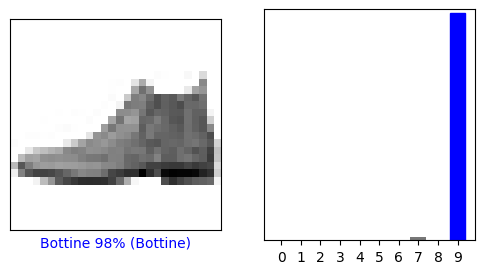

In [60]:
print(list(enumerate(class_names)))
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


[(0, 'Haut/T-shirt'), (1, 'Pantalon'), (2, 'Pull'), (3, 'Robe'), (4, 'Manteau'), (5, 'Sandale'), (6, 'Chemise'), (7, 'Basket'), (8, 'Sac'), (9, 'Bottine')]


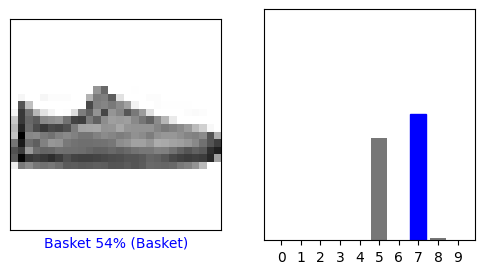

In [62]:
print(list(enumerate(class_names)))
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Traçons plusieurs images avec leurs prédictions. Notez que le modèle peut se tromper même lorsqu'il est très confiant.

[(0, 'Haut/T-shirt'), (1, 'Pantalon'), (2, 'Pull'), (3, 'Robe'), (4, 'Manteau'), (5, 'Sandale'), (6, 'Chemise'), (7, 'Basket'), (8, 'Sac'), (9, 'Bottine')]


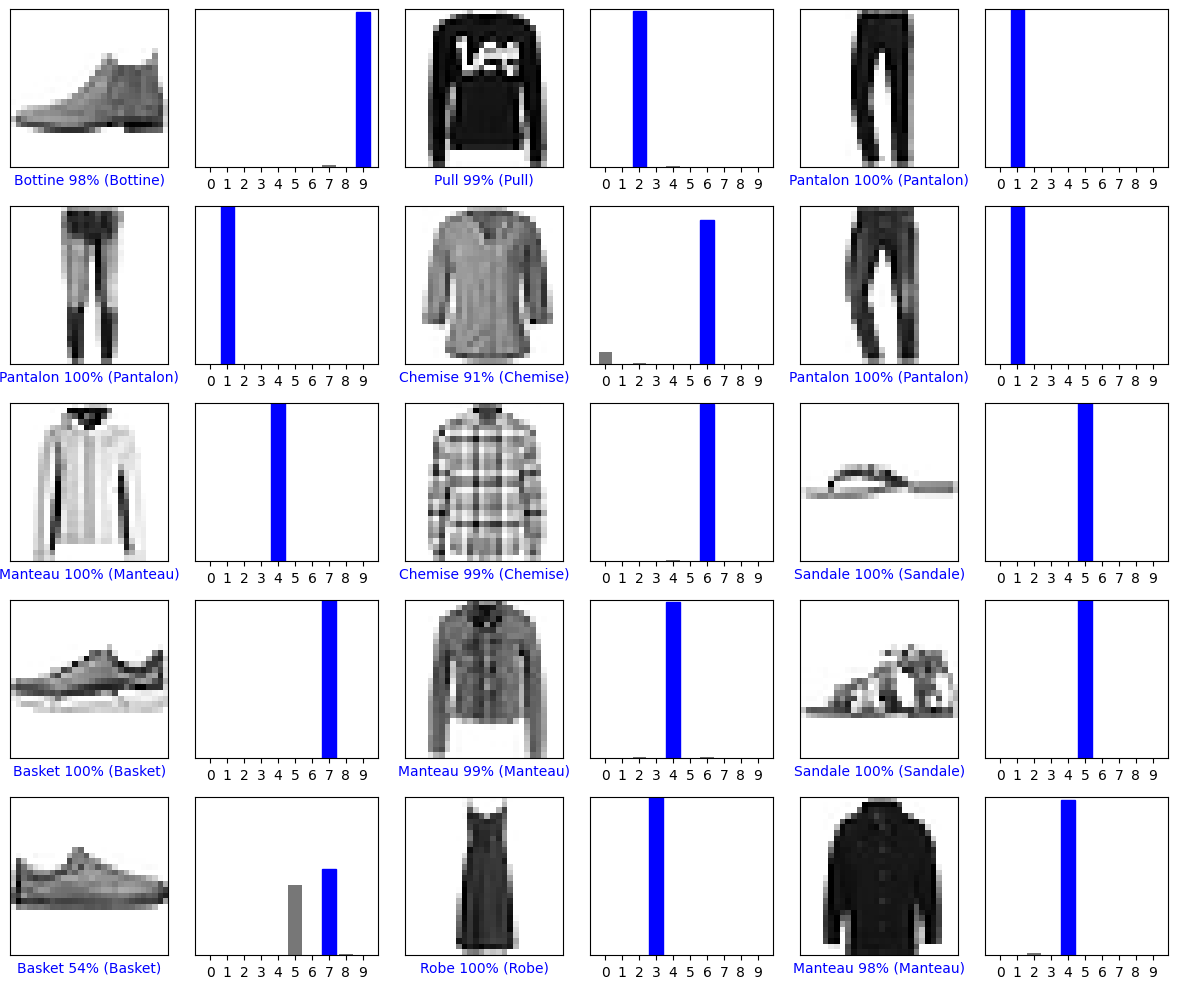

In [64]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
print(list(enumerate(class_names)))
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Utiliser le modèle entraîné

Enfin, utilisez le modèle entraîné pour faire une prédiction sur une seule image.

In [65]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Les modèles `keras` sont optimisés pour effectuer des prédictions sur un *lot* ou une collection d'exemples à la fois. Par conséquent, même si vous utilisez une seule image, vous devez l'ajouter à une liste :

In [66]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Maintenant, prédisez l'étiquette correcte pour cette image :

In [67]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 29ms/step
[[1.1155150e-03 4.1264051e-11 9.8500764e-01 2.8134084e-09 9.4490862e-03
  1.9576314e-13 4.4266242e-03 8.9209205e-14 1.1464456e-06 1.7595234e-11]]


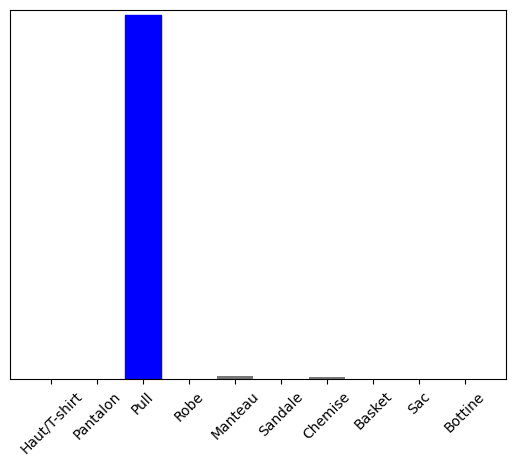

In [68]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`keras.Model.predict` retourne une liste de listes, une liste pour chaque image dans le lot de données. Obtenez les prédictions pour notre (seule) image dans le lot :

In [69]:
np.argmax(predictions_single[0])

2

Et le modèle prédit une étiquette comme prévu.

Pour en savoir plus sur la construction de modèles avec Keras, consultez les [guides Keras](https://www.tensorflow.org/guide/keras).



## Exercice

Utilisez le modèle entraîné pour les images numéro 10, 200, 1000, et votre numéro de chance.

In [70]:
????

Object `??` not found.
